# A survey of optimisation methods

## Marc Garcia - @datapythonista

Agenda

- Optimisation is everywhere
- Components of an optimisation problem
- Example: Ordinary least squares

## Why optimisation?

Optimisation is **everywhere**

- I came to Cambridge minimising commute time and cost

- I deliver this talk maximising the content I can present on a given time

- Every company's goal is to maximise the top or bottom lines of their P&L

- Everything in **machine learning** is a simple problem and an optimisation problem

# Components of an optimisation problem

- Variables
- Objective function
- Constraints

## Optimisation "hello world"

<img alt="" src="img/coins.png" style="float: right;"/>

- We have **3 coins**
- With every coin we can buy **20 sweets**
- We want to buy as many sweets as possible

**Variables**:

- The number of coins we spend `num_coins`

**Objective function**:

- maximum of the number of sweets bought

as a function of the variables:

- maximum of `num_coins * 20`

**Constraints:**

- Maximum number of spent coins is 3: `num_coins <= 3`

In [2]:
def generate_solutions():
    """Generate possible solutions (that satisfy constraints).""" 
    num_coins = 0
    while num_coins <= 3:
        yield num_coins
        num_coins += 1

def objective_function(num_coins):
    """Value to maximise."""
    return num_coins * 20

results = {}
for solution in generate_solutions():
    results[solution] = objective_function(solution)

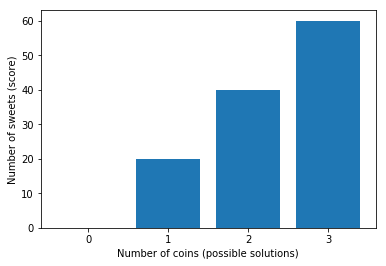

In [15]:
from matplotlib import pyplot

pyplot.bar(results.keys(), results.values())
pyplot.ylabel('Number of sweets (score)')
pyplot.xlabel('Number of coins (possible solutions)')
pyplot.xticks(list(results.keys()));

Properties:

- Our variable is **discrete**
- The number of solutions is **limited** and **small**
- We can easily **evaluate how good a solution is**

In [41]:
from matplotlib import pyplot
import ipywidgets

POINTS = [(1.14, 1.36), (2.89, 2.06), (3.87, 5.11), (4.88, 5.73), (5.66, 7.11), (7.43, 6.77)]

def update(alpha=-1., beta=1.2):
    x, y = zip(*POINTS)
    pyplot.scatter(x, y)
    pyplot.plot((0, max(x)), (alpha, max(x) * beta + alpha), c='r')
    pyplot.xlim(0, None)
    pyplot.ylim(0, max(y) * 1.4)

ipywidgets.interact(update);

interactive(children=(FloatSlider(value=-1.0, description='alpha', max=1.0, min=-3.0), FloatSlider(value=1.2, …

In [55]:
import numpy
import statsmodels.api

x, y = zip(*POINTS)
x = numpy.array(x)
x = statsmodels.api.add_constant(x)
ols = statsmodels.api.OLS(x, y).fit()
alpha, beta = ols.params[0]

beta

0.9031266881092677

Properties

- Our variables are **continuous**
- The number of solutions is **infinite**
- There are **no constraints**
- There is an **analytical function** to compute the optimal